In [1]:
import scipy as scp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import time
import seaborn as sns
from scipy.interpolate import interp1d
import stlesol as sls

### Overdamped Langevin equation

$$\gamma \frac{dx(t)}{dt} = -\frac{dU(x)}{dt} + F_{st}^{\alpha}(t)$$

The alpha-stable distribution may be reduced to the Normal distribution by setting $\alpha$ parameter equal to __2__. Here

$\gamma$ -- friction coefficient

$U(x)$ -- stochastic potential with a given autocorrelation function

$F_{st}^{\alpha}(t)$ -- stochastic force with from alpha-stable distribution

In [2]:
#  Parameters for the Langevin equation (LE) solver
dt = 2e-4
dx = 2e-2
t_steps = 10000
t_sol = np.arange(0, (t_steps + 1) * dt, dt)
x_lim = dx*(2**18)
n_attempts = 10000
alpha = 2.0
U0= 1.0
K_alpha = 1.0

In [7]:
# LE solution
x_sol = sls.solve_le_corr_alpha_euler_periodic(dt, dx, t_steps, x_lim, sls.acf_polynomial,
                                  n_attempts=n_attempts, alpha=alpha, U0=U0, K_alpha=K_alpha)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


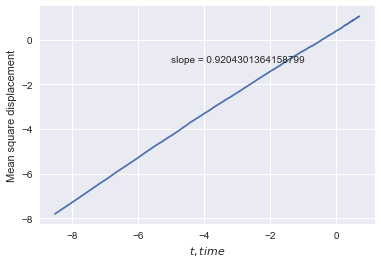

In [12]:
%matplotlib inline
plt.plot(np.log(t_sol), np.log(sls.calculate_eamsd(x_sol)));
plt.ylabel('Mean square displacement')
plt.xlabel('$t, time$')
plt.text(-5, -1, str('slope = ') + str(np.polyfit(np.log(t_sol[1:]), np.log(sls.calculate_eamsd(x_sol)[1:]), 1)[0]));

# First passage time calculations

In [5]:
t_fpt = sls.calculate_fpt(t_sol, x_sol, dx_barrier=1.)

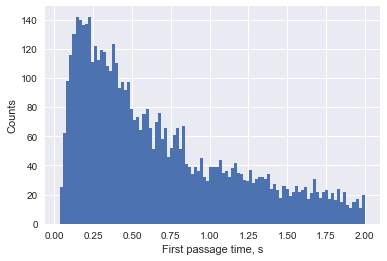

In [13]:
fpt_bins = plt.hist(t_fpt[t_fpt < 1000], bins = 100)
fpt_probs = fpt_bins[0] / t_fpt.size
fpt_bins_centers = (fpt_bins[1][:-1] + fpt_bins[1][1:]) / 2
plt.xlabel('First passage time, s')
plt.ylabel('Counts')